# Heavy Rainfall

Graphs out the mm of rain for the day in each year that had the heaviest rainfall.

## Requirements: 
Run downloadGHCNd.ipynb located /1_atmosphere/downloadGHCnd.ipynb to download the required GHCNd data

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
import pickle 

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

In [4]:
precip = pd.read_pickle("../../GHCNd/pkl/PRECIP_KOROR_PSW00040309.pkl")
precip_table = {}
#This file also had the same issue with the csv not including proper decimal values
precip["PRCP"] = precip["PRCP"]/10
precip["WET_DAY"]= precip["PRCP"] >= 1.0
precip['DATE'] = pd.to_datetime(precip['DATE'], format='%Y-%m-%d')
precip["YEAR"] = precip['DATE'].dt.year

In [5]:
precip

,STATION,DATE,LATITUDE,LONGITUDE,ELEVATION,NAME,PRCP,SNOW,SNWD,WET_DAY,YEAR
0,PSW00040309,1951-07-01,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,0.0,0.0,False,1951
1,PSW00040309,1951-07-02,7.33674,134.47686,27.4,"KOROR, PW PS",0.8,0.0,0.0,False,1951
2,PSW00040309,1951-07-03,7.33674,134.47686,27.4,"KOROR, PW PS",3.8,0.0,0.0,True,1951
3,PSW00040309,1951-07-04,7.33674,134.47686,27.4,"KOROR, PW PS",18.3,0.0,0.0,True,1951
4,PSW00040309,1951-07-05,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,0.0,0.0,False,1951
...,...,...,...,...,...,...,...,...,...,...,...
25987,PSW00040309,2024-01-03,7.33674,134.47686,27.4,"KOROR, PW PS",1.0,NaN,NaN,True,2024
25988,PSW00040309,2024-01-04,7.33674,134.47686,27.4,"KOROR, PW PS",16.0,NaN,NaN,True,2024
25989,PSW00040309,2024-01-05,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,NaN,NaN,False,2024
25990,PSW00040309,2024-01-06,7.33674,134.47686,27.4,"KOROR, PW PS",0.0,NaN,NaN,False,2024


In [6]:
heavy_rainfall = precip.groupby('YEAR')['PRCP'].max()

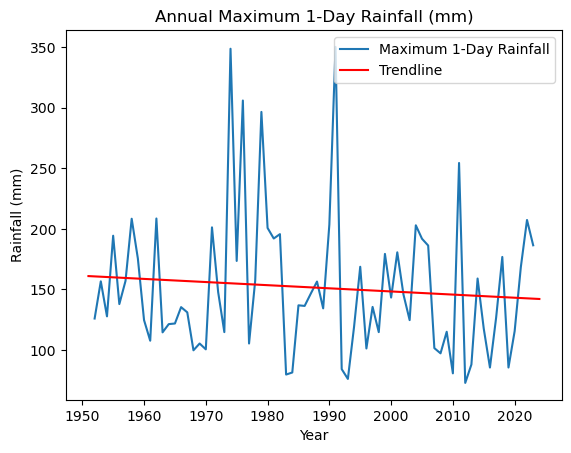

In [8]:
plt.plot(heavy_rainfall[1:-1].index,heavy_rainfall[1:-1].values, label = "Maximum 1-Day Rainfall")
plt.xlabel('Year')
plt.ylabel('Rainfall (mm)')
# plt.title("Annual Total Rainfall on Wet Days")

z = np.polyfit(heavy_rainfall[1:-1].index, heavy_rainfall[1:-1].values, 1)  # Fit a linear trendline
p = np.poly1d(z)  # Create a polynomial function for the trendline
#save decadal trend
precip_table["Annual heavy rainfall"] = z[0]*10
plt.plot(heavy_rainfall.index, p(heavy_rainfall.index), label='Trendline', color="red")
plt.title("Annual Maximum 1-Day Rainfall (mm)")
plt.legend()
plt.savefig('historical-maximum-1-day-rainfall.png', format='png',dpi=300,facecolor='white')
plt.show()